In [914]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [915]:
# import data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
match = pd.read_csv('data/match_reports.csv')
holiday = pd.read_csv('data/holidays_in_japan.csv')
venue = pd.read_csv('data/venue_information.csv')
city = pd.read_csv('data/city.csv')

In [916]:
train

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,14:03,第34節,第1日,川崎Ｆ,大宮,等々力陸上競技場,晴,11.7,40,DAZN/NHK BS1,25904
3668,19377,2017-12-02,14:03,第34節,第1日,甲府,仙台,山梨中銀スタジアム,晴,18.3,34,DAZN,14680
3669,19378,2017-12-02,14:04,第34節,第1日,新潟,Ｃ大阪,デンカビッグスワンスタジアム,晴,6.7,60,DAZN,19684
3670,19379,2017-12-02,14:03,第34節,第1日,磐田,鹿島,ヤマハスタジアム(磐田),晴,17.7,30,DAZN/NHK総合,14696


In [917]:
test

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters
0,20745,2018-02-23,20:03,第1節,第1日,鳥栖,神戸,ベストアメニティスタジアム,晴,6.6,57,DAZN
1,20746,2018-02-24,14:03,第1節,第2日,FC東京,浦和,味の素スタジアム,晴,14.1,40,DAZN/NHK BS1/TOKYO MX(録)
2,20747,2018-02-24,14:03,第1節,第2日,広島,札幌,エディオンスタジアム広島,晴,16.3,51,DAZN/NHK広島/NHK札幌
3,20748,2018-02-24,14:33,第1節,第2日,Ｇ大阪,名古屋,パナソニック スタジアム 吹田,曇,12.9,42,DAZN
4,20749,2018-02-24,16:03,第1節,第2日,湘南,長崎,Shonan BMW スタジアム平塚,晴,13.8,50,DAZN
...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,14:03,第34節,第1日,清水,鳥栖,IAIスタジアム日本平,曇,11.5,52,DAZN/テレビ静岡
608,21790,2019-12-07,14:03,第34節,第1日,名古屋,鹿島,豊田スタジアム,曇,9.0,42,DAZN/NHK名古屋
609,21791,2019-12-07,14:03,第34節,第1日,神戸,磐田,ノエビアスタジアム神戸,曇,10.9,42,DAZN
610,21792,2019-12-07,14:03,第34節,第1日,広島,仙台,エディオンスタジアム広島,晴,10.1,56,DAZN/NHK広島/NHK仙台


In [918]:
# merge data

train = train.merge(venue, on='venue', how='left')
train = train.merge(match, on='id', how='left')

test = test.merge(venue, on='venue', how='left')
test = test.merge(match, on='id', how='left')

In [919]:
train.columns

Index(['id', 'match_date', 'kick_off_time', 'section', 'round', 'home_team',
       'away_team', 'venue', 'weather', 'temperature', 'humidity',
       'broadcasters', 'attendance', 'capacity', 'address',
       'home_team_player11', 'home_team_player10', 'home_team_player9',
       'home_team_player8', 'home_team_player7', 'home_team_player6',
       'home_team_player5', 'home_team_player4', 'home_team_player3',
       'home_team_player2', 'home_team_player1', 'home_team_score',
       'away_team_score', 'away_team_player1', 'away_team_player2',
       'away_team_player3', 'away_team_player4', 'away_team_player5',
       'away_team_player6', 'away_team_player7', 'away_team_player8',
       'away_team_player9', 'away_team_player10', 'away_team_player11'],
      dtype='object')

In [920]:
# venue

def extract_prefecture(address):
    match = re.match(r'^(北海道|京都府|[^市区町村]+?[都道府県])', address)
    return match.group(0) if match else None

train['prefecture'] = train['address'].apply(extract_prefecture)
test['prefecture'] = test['address'].apply(extract_prefecture)

train = train.merge(city, on='prefecture', how='left')
test = test.merge(city, on='prefecture', how='left')

train.drop(columns=['venue','address','city','prefecture'],inplace=True)
test.drop(columns=['venue','address','city','prefecture'],inplace=True)

In [921]:
train.head(20)

,id,match_date,kick_off_time,section,round,home_team,away_team,weather,temperature,humidity,...,away_team_player4,away_team_player5,away_team_player6,away_team_player7,away_team_player8,away_team_player9,away_team_player10,away_team_player11,latitude,longitude
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,晴,8.3,40,...,20 堀之内聖 DF,6 山田暢久 MF,17 長谷部誠 MF,13 鈴木啓太 MF,8 三都主アレサンドロ MF,18 小野伸二 MF,10 ポンテ FW,21 ワシントン FW,34.6937,135.502
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,晴,12.9,28,...,4 高木和道 DF,3 山西尊裕 DF,13 兵働昭弘 MF,7 伊東輝悦 MF,16 枝村匠馬 MF,10 藤本淳吾 MF,18 チョジェジン FW,17 マルキーニョス FW,35.6623,138.568
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,晴,12.1,35,...,22 上本大海 DF,5 エジミウソン MF,11 トゥーリオ MF,6 梅田高志 MF,17 根本裕一 MF,26 内村圭宏 MF,13 高松大樹 FW,9 オズマール FW,35.6895,139.692
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,晴,11.6,42,...,5 千代反田充 DF,3 アレックス DF,7 宮崎光平 MF,6 布部陽功 MF,8 ホベルト MF,14 古賀誠史 MF,27 田中佑昌 FW,36 グラウシオ FW,34.9756,138.383
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,晴,13.1,32,...,3 柳本啓成 DF,4 河村崇大 MF,23 下村東美 MF,10 ピンゴ MF,6 ゼカルロス MF,8 森島寛晃 FW,20 西澤明訓 FW,9 古橋達弥 FW,35.1814,136.906
5,9195,2006-03-05,15:03,第1節,第2日,大宮,千葉,晴,12.6,33,...,2 坂本將貴 MF,6 阿部勇樹 MF,7 佐藤勇人 MF,16 山岸智 MF,8 水野晃樹 MF,22 羽生直剛 MF,10 ハース FW,18 巻誠一郎 FW,35.8617,139.645
6,9196,2006-03-05,15:00,第1節,第2日,川崎F,新潟,晴,13.3,34,...,26 中野洋司 DF,5 梅山修 DF,16 寺川能人 MF,15 本間勲 MF,8 シルビーニョ MF,18 鈴木慎吾 MF,10 エジミウソン FW,11 矢野貴章 FW,35.4437,139.638
7,9197,2006-03-05,15:06,第1節,第2日,広島,鹿島,曇,12.4,58,...,4 大岩剛 DF,7 新井場徹 DF,24 青木剛 MF,26 増田誓志 MF,8 小笠原満男 MF,10 本山雅志 MF,11 深井正樹 FW,13 柳沢敦 FW,34.3852,132.455
8,9198,2006-03-05,15:35,第1節,第2日,横浜FM,京都,晴,12.6,34,...,2 鈴木悟 DF,7 児玉新 DF,18 米田兼一郎 MF,16 斉藤大介 MF,11 星大輔 MF,14 中払大介 MF,10 パウリーニョ FW,31 田原豊 FW,35.4437,139.638
9,9199,2006-03-11,14:04,第2節,第1日,浦和,磐田,晴,16.0,48,...,20 金珍圭 DF,6 服部年宏 DF,11 西紀寛 MF,8 菊地直哉 MF,25 ファブリシオ MF,14 村井慎二 MF,7 名波浩 MF,22 カレンロバート FW,35.8617,139.645


In [922]:
test

,id,match_date,kick_off_time,section,round,home_team,away_team,weather,temperature,humidity,...,away_team_player4,away_team_player5,away_team_player6,away_team_player7,away_team_player8,away_team_player9,away_team_player10,away_team_player11,latitude,longitude
0,20745,2018-02-23,20:03,第1節,第1日,鳥栖,神戸,晴,6.6,57,...,3 渡部博文 DF,22 橋本和 DF,8 三田啓貴 MF,23 松下佳貴 MF,24 三原雅俊 MF,10 ルーカスポドルスキ MF,19 渡邉千真 FW,9 ハーフナーマイク FW,33.2635,130.301
1,20746,2018-02-24,14:03,第1節,第2日,FC東京,浦和,晴,14.1,40,...,5 槙野智章 DF,3 宇賀神友弥 DF,16 青木拓矢 MF,11 マルティノス MF,10 柏木陽介 MF,15 長澤和輝 MF,9 武藤雄樹 MF,30 興梠慎三 FW,35.6895,139.692
2,20747,2018-02-24,14:03,第1節,第2日,広島,札幌,晴,16.3,51,...,5 福森晃斗 DF,14 駒井善成 MF,10 宮澤裕樹 MF,8 深井一希 MF,38 菅大輝 MF,41 三好康児 MF,18 チャナティップ MF,48 ジェイ FW,34.3852,132.455
3,20748,2018-02-24,14:33,第1節,第2日,Ｇ大阪,名古屋,曇,12.9,42,...,41 菅原由勢 DF,14 秋山陽介 DF,23 青木亮太 MF,9 長谷川アーリアジャスール MF,4 小林裕紀 MF,29 和泉竜司 MF,10 ガブリエルシャビエル FW,7 ジョー FW,34.6937,135.502
4,20749,2018-02-24,16:03,第1節,第2日,湘南,長崎,晴,13.8,50,...,5 田上大地 DF,3 飯尾竜太朗 MF,6 前田悠佑 MF,15 島田譲 MF,28 翁長聖 MF,19 澤田崇 MF,18 ベンハロラン MF,9 ファンマ FW,35.4437,139.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,14:03,第34節,第1日,清水,鳥栖,曇,11.5,52,...,2 三丸拡 DF,5 金井貢史 MF,6 福田晃斗 MF,4 原川力 MF,7 イサッククエンカ MF,40 小野裕二 FW,11 豊田陽平 FW,39 金森健志 FW,34.9756,138.383
608,21790,2019-12-07,14:03,第34節,第1日,名古屋,鹿島,曇,9.0,42,...,39 犬飼智也 DF,28 町田浩樹 DF,20 三竿健斗 MF,4 レオシルバ MF,25 遠藤康 MF,41 白崎凌兵 MF,8 土居聖真 FW,18 セルジーニョ FW,35.1814,136.906
609,21791,2019-12-07,14:03,第34節,第1日,神戸,磐田,曇,10.9,42,...,33 藤田義明 DF,13 宮崎智彦 MF,14 松本昌也 MF,15 アダイウトン MF,26 藤川虎太朗 MF,30 上原力也 MF,40 エベシリオ MF,39 ルキアン FW,34.6901,135.196
610,21792,2019-12-07,14:03,第34節,第1日,広島,仙台,晴,10.1,56,...,13 平岡康裕 DF,2 永戸勝也 DF,17 富田晋伍 MF,5 椎橋慧也 MF,30 田中渉 MF,10 梁勇基 MF,11 石原直樹 FW,38 長沢駿 FW,34.3852,132.455


In [923]:
# match

players = {'home_team_player11', 'home_team_player10', 'home_team_player9',
       'home_team_player8', 'home_team_player7', 'home_team_player6',
       'home_team_player5', 'home_team_player4', 'home_team_player3',
       'home_team_player2', 'home_team_player1',  'away_team_player1', 'away_team_player2',
       'away_team_player3', 'away_team_player4', 'away_team_player5',
       'away_team_player6', 'away_team_player7', 'away_team_player8',
       'away_team_player9', 'away_team_player10', 'away_team_player11'}

train.drop(columns=players,inplace=True)
test.drop(columns=players,inplace=True)

score = {'home_team_score','away_team_score'}

train.drop(columns=score,inplace=True)
test.drop(columns=score,inplace=True)

In [924]:
train

,id,match_date,kick_off_time,section,round,home_team,away_team,weather,temperature,humidity,broadcasters,attendance,capacity,latitude,longitude
0,9190,2006-03-04,16:04,第1節,第1日,G大阪,浦和,晴,8.3,40,NHK総合/J SPORTS(録),20916,21000,34.6937,135.502
1,9191,2006-03-05,13:00,第1節,第2日,甲府,清水,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,15859,35.6623,138.568
2,9192,2006-03-05,13:35,第1節,第2日,FC東京,大分,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,47851,35.6895,139.692
3,9193,2006-03-05,14:04,第1節,第2日,磐田,福岡,晴,11.6,42,J SPORTS,28564,51697,34.9756,138.383
4,9194,2006-03-05,14:04,第1節,第2日,名古屋,C大阪,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,20223,35.1814,136.906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,14:03,第34節,第1日,川崎Ｆ,大宮,晴,11.7,40,DAZN/NHK BS1,25904,26232,35.4437,139.638
3668,19377,2017-12-02,14:03,第34節,第1日,甲府,仙台,晴,18.3,34,DAZN,14680,17000,35.6623,138.568
3669,19378,2017-12-02,14:04,第34節,第1日,新潟,Ｃ大阪,晴,6.7,60,DAZN,19684,41684,37.9162,139.036
3670,19379,2017-12-02,14:03,第34節,第1日,磐田,鹿島,晴,17.7,30,DAZN/NHK総合,14696,15165,34.9756,138.383


In [925]:
test

,id,match_date,kick_off_time,section,round,home_team,away_team,weather,temperature,humidity,broadcasters,capacity,latitude,longitude
0,20745,2018-02-23,20:03,第1節,第1日,鳥栖,神戸,晴,6.6,57,DAZN,24130,33.2635,130.301
1,20746,2018-02-24,14:03,第1節,第2日,FC東京,浦和,晴,14.1,40,DAZN/NHK BS1/TOKYO MX(録),47851,35.6895,139.692
2,20747,2018-02-24,14:03,第1節,第2日,広島,札幌,晴,16.3,51,DAZN/NHK広島/NHK札幌,36894,34.3852,132.455
3,20748,2018-02-24,14:33,第1節,第2日,Ｇ大阪,名古屋,曇,12.9,42,DAZN,39694,34.6937,135.502
4,20749,2018-02-24,16:03,第1節,第2日,湘南,長崎,晴,13.8,50,DAZN,15380,35.4437,139.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,14:03,第34節,第1日,清水,鳥栖,曇,11.5,52,DAZN/テレビ静岡,19594,34.9756,138.383
608,21790,2019-12-07,14:03,第34節,第1日,名古屋,鹿島,曇,9.0,42,DAZN/NHK名古屋,43739,35.1814,136.906
609,21791,2019-12-07,14:03,第34節,第1日,神戸,磐田,曇,10.9,42,DAZN,29913,34.6901,135.196
610,21792,2019-12-07,14:03,第34節,第1日,広島,仙台,晴,10.1,56,DAZN/NHK広島/NHK仙台,36894,34.3852,132.455


In [926]:
# timestamp

train['match_date'] = pd.to_datetime(train['match_date'])
train['date'] = train['match_date'].dt.date
train['year'] = train['match_date'].dt.year
train['month'] = train['match_date'].dt.month
train['day'] = train['match_date'].dt.day
train['day_of_week'] = train['match_date'].dt.dayofweek
train['kick_off_hour'] = pd.to_datetime(train['kick_off_time'], format='%H:%M').dt.hour

test['match_date'] = pd.to_datetime(test['match_date'])
test['date'] = test['match_date'].dt.date
test['year'] = test['match_date'].dt.year
test['month'] = test['match_date'].dt.month
test['day'] = test['match_date'].dt.day
test['day_of_week'] = test['match_date'].dt.dayofweek
test['kick_off_hour'] = pd.to_datetime(test['kick_off_time'], format='%H:%M').dt.hour

holiday['holiday_date'] = pd.to_datetime(holiday['holiday_date'])
holidays_set = set(holiday['holiday_date'].dt.date)

train['is_holiday'] = train['date'].apply(lambda x: 1 if x in holidays_set else 0)
test['is_holiday'] = test['match_date'].apply(lambda x: 1 if x in holidays_set else 0)

train['is_weekend'] = train['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
test['is_weekend'] = test['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

train.drop(columns=['kick_off_time','date'],inplace=True)
test.drop(columns=['kick_off_time','date'],inplace=True)

In [927]:
train

,id,match_date,section,round,home_team,away_team,weather,temperature,humidity,broadcasters,...,capacity,latitude,longitude,year,month,day,day_of_week,kick_off_hour,is_holiday,is_weekend
0,9190,2006-03-04,第1節,第1日,G大阪,浦和,晴,8.3,40,NHK総合/J SPORTS(録),...,21000,34.6937,135.502,2006,3,4,5,16,0,1
1,9191,2006-03-05,第1節,第2日,甲府,清水,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),...,15859,35.6623,138.568,2006,3,5,6,13,0,1
2,9192,2006-03-05,第1節,第2日,FC東京,大分,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),...,47851,35.6895,139.692,2006,3,5,6,13,0,1
3,9193,2006-03-05,第1節,第2日,磐田,福岡,晴,11.6,42,J SPORTS,...,51697,34.9756,138.383,2006,3,5,6,14,0,1
4,9194,2006-03-05,第1節,第2日,名古屋,C大阪,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),...,20223,35.1814,136.906,2006,3,5,6,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,第34節,第1日,川崎Ｆ,大宮,晴,11.7,40,DAZN/NHK BS1,...,26232,35.4437,139.638,2017,12,2,5,14,0,1
3668,19377,2017-12-02,第34節,第1日,甲府,仙台,晴,18.3,34,DAZN,...,17000,35.6623,138.568,2017,12,2,5,14,0,1
3669,19378,2017-12-02,第34節,第1日,新潟,Ｃ大阪,晴,6.7,60,DAZN,...,41684,37.9162,139.036,2017,12,2,5,14,0,1
3670,19379,2017-12-02,第34節,第1日,磐田,鹿島,晴,17.7,30,DAZN/NHK総合,...,15165,34.9756,138.383,2017,12,2,5,14,0,1


In [928]:
test

,id,match_date,section,round,home_team,away_team,weather,temperature,humidity,broadcasters,capacity,latitude,longitude,year,month,day,day_of_week,kick_off_hour,is_holiday,is_weekend
0,20745,2018-02-23,第1節,第1日,鳥栖,神戸,晴,6.6,57,DAZN,24130,33.2635,130.301,2018,2,23,4,20,0,0
1,20746,2018-02-24,第1節,第2日,FC東京,浦和,晴,14.1,40,DAZN/NHK BS1/TOKYO MX(録),47851,35.6895,139.692,2018,2,24,5,14,0,1
2,20747,2018-02-24,第1節,第2日,広島,札幌,晴,16.3,51,DAZN/NHK広島/NHK札幌,36894,34.3852,132.455,2018,2,24,5,14,0,1
3,20748,2018-02-24,第1節,第2日,Ｇ大阪,名古屋,曇,12.9,42,DAZN,39694,34.6937,135.502,2018,2,24,5,14,0,1
4,20749,2018-02-24,第1節,第2日,湘南,長崎,晴,13.8,50,DAZN,15380,35.4437,139.638,2018,2,24,5,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,第34節,第1日,清水,鳥栖,曇,11.5,52,DAZN/テレビ静岡,19594,34.9756,138.383,2019,12,7,5,14,0,1
608,21790,2019-12-07,第34節,第1日,名古屋,鹿島,曇,9.0,42,DAZN/NHK名古屋,43739,35.1814,136.906,2019,12,7,5,14,0,1
609,21791,2019-12-07,第34節,第1日,神戸,磐田,曇,10.9,42,DAZN,29913,34.6901,135.196,2019,12,7,5,14,0,1
610,21792,2019-12-07,第34節,第1日,広島,仙台,晴,10.1,56,DAZN/NHK広島/NHK仙台,36894,34.3852,132.455,2019,12,7,5,14,0,1


In [929]:
# media

train['media'] = train['broadcasters'].apply(lambda x: len(x.split('/')))
test['media'] = test['broadcasters'].apply(lambda x: len(x.split('/')))

train['nhk'] = train['broadcasters'].str.contains('NHK総合')
test['nhk'] = test['broadcasters'].str.contains('NHK総合')

train['nhk'] = train['nhk'].astype(int)
test['nhk'] = test['nhk'].astype(int)

train.drop(columns=['broadcasters'],inplace=True)
test.drop(columns=['broadcasters'],inplace=True)

In [930]:
train

,id,match_date,section,round,home_team,away_team,weather,temperature,humidity,attendance,...,longitude,year,month,day,day_of_week,kick_off_hour,is_holiday,is_weekend,media,nhk
0,9190,2006-03-04,第1節,第1日,G大阪,浦和,晴,8.3,40,20916,...,135.502,2006,3,4,5,16,0,1,2,1
1,9191,2006-03-05,第1節,第2日,甲府,清水,晴,12.9,28,14277,...,138.568,2006,3,5,6,13,0,1,3,0
2,9192,2006-03-05,第1節,第2日,FC東京,大分,晴,12.1,35,22531,...,139.692,2006,3,5,6,13,0,1,3,0
3,9193,2006-03-05,第1節,第2日,磐田,福岡,晴,11.6,42,28564,...,138.383,2006,3,5,6,14,0,1,1,0
4,9194,2006-03-05,第1節,第2日,名古屋,C大阪,晴,13.1,32,17199,...,136.906,2006,3,5,6,14,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,第34節,第1日,川崎Ｆ,大宮,晴,11.7,40,25904,...,139.638,2017,12,2,5,14,0,1,2,0
3668,19377,2017-12-02,第34節,第1日,甲府,仙台,晴,18.3,34,14680,...,138.568,2017,12,2,5,14,0,1,1,0
3669,19378,2017-12-02,第34節,第1日,新潟,Ｃ大阪,晴,6.7,60,19684,...,139.036,2017,12,2,5,14,0,1,1,0
3670,19379,2017-12-02,第34節,第1日,磐田,鹿島,晴,17.7,30,14696,...,138.383,2017,12,2,5,14,0,1,2,1


In [931]:
test

,id,match_date,section,round,home_team,away_team,weather,temperature,humidity,capacity,...,longitude,year,month,day,day_of_week,kick_off_hour,is_holiday,is_weekend,media,nhk
0,20745,2018-02-23,第1節,第1日,鳥栖,神戸,晴,6.6,57,24130,...,130.301,2018,2,23,4,20,0,0,1,0
1,20746,2018-02-24,第1節,第2日,FC東京,浦和,晴,14.1,40,47851,...,139.692,2018,2,24,5,14,0,1,3,0
2,20747,2018-02-24,第1節,第2日,広島,札幌,晴,16.3,51,36894,...,132.455,2018,2,24,5,14,0,1,3,0
3,20748,2018-02-24,第1節,第2日,Ｇ大阪,名古屋,曇,12.9,42,39694,...,135.502,2018,2,24,5,14,0,1,1,0
4,20749,2018-02-24,第1節,第2日,湘南,長崎,晴,13.8,50,15380,...,139.638,2018,2,24,5,16,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,第34節,第1日,清水,鳥栖,曇,11.5,52,19594,...,138.383,2019,12,7,5,14,0,1,2,0
608,21790,2019-12-07,第34節,第1日,名古屋,鹿島,曇,9.0,42,43739,...,136.906,2019,12,7,5,14,0,1,2,0
609,21791,2019-12-07,第34節,第1日,神戸,磐田,曇,10.9,42,29913,...,135.196,2019,12,7,5,14,0,1,1,0
610,21792,2019-12-07,第34節,第1日,広島,仙台,晴,10.1,56,36894,...,132.455,2019,12,7,5,14,0,1,3,0


In [932]:
# team

all_teams = pd.concat([train['home_team'], train['away_team'], test['home_team'], test['away_team']]).unique()

onehot_encoded_train = pd.DataFrame(0, index=train.index, columns=all_teams)
onehot_encoded_test = pd.DataFrame(0, index=test.index, columns=all_teams)

for index, row in train.iterrows():
    onehot_encoded_train.at[index, row['home_team']] = 1
    onehot_encoded_train.at[index, row['away_team']] = 1

for index, row in test.iterrows():
    onehot_encoded_test.at[index, row['home_team']] = 1
    onehot_encoded_test.at[index, row['away_team']] = 1

train = pd.concat([train, onehot_encoded_train], axis=1)
test = pd.concat([test, onehot_encoded_test], axis=1)

train.drop(columns=['home_team', 'away_team'], inplace=True)
test.drop(columns=['home_team', 'away_team'], inplace=True)

In [933]:
train

,id,match_date,section,round,weather,temperature,humidity,attendance,capacity,latitude,...,山形,湘南,仙台,鳥栖,徳島,松本,Ｃ大阪,Ｇ大阪,川崎Ｆ,長崎
0,9190,2006-03-04,第1節,第1日,晴,8.3,40,20916,21000,34.6937,...,0,0,0,0,0,0,0,0,0,0
1,9191,2006-03-05,第1節,第2日,晴,12.9,28,14277,15859,35.6623,...,0,0,0,0,0,0,0,0,0,0
2,9192,2006-03-05,第1節,第2日,晴,12.1,35,22531,47851,35.6895,...,0,0,0,0,0,0,0,0,0,0
3,9193,2006-03-05,第1節,第2日,晴,11.6,42,28564,51697,34.9756,...,0,0,0,0,0,0,0,0,0,0
4,9194,2006-03-05,第1節,第2日,晴,13.1,32,17199,20223,35.1814,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,第34節,第1日,晴,11.7,40,25904,26232,35.4437,...,0,0,0,0,0,0,0,0,1,0
3668,19377,2017-12-02,第34節,第1日,晴,18.3,34,14680,17000,35.6623,...,0,0,1,0,0,0,0,0,0,0
3669,19378,2017-12-02,第34節,第1日,晴,6.7,60,19684,41684,37.9162,...,0,0,0,0,0,0,1,0,0,0
3670,19379,2017-12-02,第34節,第1日,晴,17.7,30,14696,15165,34.9756,...,0,0,0,0,0,0,0,0,0,0


In [934]:
test

,id,match_date,section,round,weather,temperature,humidity,capacity,latitude,longitude,...,山形,湘南,仙台,鳥栖,徳島,松本,Ｃ大阪,Ｇ大阪,川崎Ｆ,長崎
0,20745,2018-02-23,第1節,第1日,晴,6.6,57,24130,33.2635,130.301,...,0,0,0,1,0,0,0,0,0,0
1,20746,2018-02-24,第1節,第2日,晴,14.1,40,47851,35.6895,139.692,...,0,0,0,0,0,0,0,0,0,0
2,20747,2018-02-24,第1節,第2日,晴,16.3,51,36894,34.3852,132.455,...,0,0,0,0,0,0,0,0,0,0
3,20748,2018-02-24,第1節,第2日,曇,12.9,42,39694,34.6937,135.502,...,0,0,0,0,0,0,0,1,0,0
4,20749,2018-02-24,第1節,第2日,晴,13.8,50,15380,35.4437,139.638,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,第34節,第1日,曇,11.5,52,19594,34.9756,138.383,...,0,0,0,1,0,0,0,0,0,0
608,21790,2019-12-07,第34節,第1日,曇,9.0,42,43739,35.1814,136.906,...,0,0,0,0,0,0,0,0,0,0
609,21791,2019-12-07,第34節,第1日,曇,10.9,42,29913,34.6901,135.196,...,0,0,0,0,0,0,0,0,0,0
610,21792,2019-12-07,第34節,第1日,晴,10.1,56,36894,34.3852,132.455,...,0,0,1,0,0,0,0,0,0,0


In [935]:
# weather

weather_mapping = {
    '晴': 1, '曇': 2, '屋内': 1, '曇時々晴': 2, '雨': 3, '曇のち雨': 3, '晴一時雨': 3, 
    '晴時々曇': 1, '晴のち曇': 1, '曇一時雨': 3, '雨のち曇': 3, '雨一時曇': 3, 
    '曇のち雨のち屋内': 1, '曇時々晴のち屋内': 1, '曇のち晴': 2, '曇時々雨': 3,
    '雨のち曇時々雨': 3, '曇時々雪': 3, '晴一時曇': 1, '雨時々曇': 3, 
    '曇一時雨のち曇': 3, '曇のち雨一時雷': 3, '晴時々曇一時雨': 3, '霧': 2, 
    '雷雨のち曇': 3, '曇一時雷雨のち雨': 3, '晴一時雨のち曇': 3, '曇のち雷雨': 3, 
    '雨一時曇のち雨': 3, '雪': 3, '雨のち曇のち晴': 3, '晴のち雨': 3, 
    '曇一時晴': 2, '曇一時雨のち晴': 3, '雨のち晴': 3, '晴のち曇一時雨': 3, 
    '曇一時雷雨のち曇': 3, '晴時々雪': 3, '雨時々晴': 3, '曇時々雨のち晴': 3, 
    '曇時々晴一時雨': 3, '雨のち曇一時雨': 3, '晴のち雪': 3, '雨一時雷雨': 3, 
    '曇のち雨のち曇': 3, '曇のち雨のち晴': 3, '曇晴': 2, '曇のち霧': 2, '雨のち曇のち雨': 3,
    '晴のち曇のち雨':3 , '曇一時雷雨':3,'曇時々雨のち曇':3,'雨一時雷':3
}

train['weather_encoded'] = train['weather'].map(weather_mapping)
train = train.drop(columns='weather')

test['weather_encoded'] = test['weather'].map(weather_mapping)
test = test.drop(columns='weather')

In [936]:
train

,id,match_date,section,round,temperature,humidity,attendance,capacity,latitude,longitude,...,湘南,仙台,鳥栖,徳島,松本,Ｃ大阪,Ｇ大阪,川崎Ｆ,長崎,weather_encoded
0,9190,2006-03-04,第1節,第1日,8.3,40,20916,21000,34.6937,135.502,...,0,0,0,0,0,0,0,0,0,1
1,9191,2006-03-05,第1節,第2日,12.9,28,14277,15859,35.6623,138.568,...,0,0,0,0,0,0,0,0,0,1
2,9192,2006-03-05,第1節,第2日,12.1,35,22531,47851,35.6895,139.692,...,0,0,0,0,0,0,0,0,0,1
3,9193,2006-03-05,第1節,第2日,11.6,42,28564,51697,34.9756,138.383,...,0,0,0,0,0,0,0,0,0,1
4,9194,2006-03-05,第1節,第2日,13.1,32,17199,20223,35.1814,136.906,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,第34節,第1日,11.7,40,25904,26232,35.4437,139.638,...,0,0,0,0,0,0,0,1,0,1
3668,19377,2017-12-02,第34節,第1日,18.3,34,14680,17000,35.6623,138.568,...,0,1,0,0,0,0,0,0,0,1
3669,19378,2017-12-02,第34節,第1日,6.7,60,19684,41684,37.9162,139.036,...,0,0,0,0,0,1,0,0,0,1
3670,19379,2017-12-02,第34節,第1日,17.7,30,14696,15165,34.9756,138.383,...,0,0,0,0,0,0,0,0,0,1


In [937]:
test

,id,match_date,section,round,temperature,humidity,capacity,latitude,longitude,year,...,湘南,仙台,鳥栖,徳島,松本,Ｃ大阪,Ｇ大阪,川崎Ｆ,長崎,weather_encoded
0,20745,2018-02-23,第1節,第1日,6.6,57,24130,33.2635,130.301,2018,...,0,0,1,0,0,0,0,0,0,1
1,20746,2018-02-24,第1節,第2日,14.1,40,47851,35.6895,139.692,2018,...,0,0,0,0,0,0,0,0,0,1
2,20747,2018-02-24,第1節,第2日,16.3,51,36894,34.3852,132.455,2018,...,0,0,0,0,0,0,0,0,0,1
3,20748,2018-02-24,第1節,第2日,12.9,42,39694,34.6937,135.502,2018,...,0,0,0,0,0,0,1,0,0,2
4,20749,2018-02-24,第1節,第2日,13.8,50,15380,35.4437,139.638,2018,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,第34節,第1日,11.5,52,19594,34.9756,138.383,2019,...,0,0,1,0,0,0,0,0,0,2
608,21790,2019-12-07,第34節,第1日,9.0,42,43739,35.1814,136.906,2019,...,0,0,0,0,0,0,0,0,0,2
609,21791,2019-12-07,第34節,第1日,10.9,42,29913,34.6901,135.196,2019,...,0,0,0,0,0,0,0,0,0,2
610,21792,2019-12-07,第34節,第1日,10.1,56,36894,34.3852,132.455,2019,...,0,1,0,0,0,0,0,0,0,1


In [938]:
# section & round

train['section'] = train['section'].astype(str)
train['round'] = train['round'].astype(str)
train['section'] = train['section'].str.extract('(\d+)').astype(int)
train['round'] = train['round'].str.extract('(\d+)').astype(int)

test['section'] = test['section'].astype(str)
test['round'] = test['round'].astype(str)
test['section'] = test['section'].str.extract('(\d+)').astype(int)
test['round'] = test['round'].str.extract('(\d+)').astype(int)

In [939]:
train

,id,match_date,section,round,temperature,humidity,attendance,capacity,latitude,longitude,...,湘南,仙台,鳥栖,徳島,松本,Ｃ大阪,Ｇ大阪,川崎Ｆ,長崎,weather_encoded
0,9190,2006-03-04,1,1,8.3,40,20916,21000,34.6937,135.502,...,0,0,0,0,0,0,0,0,0,1
1,9191,2006-03-05,1,2,12.9,28,14277,15859,35.6623,138.568,...,0,0,0,0,0,0,0,0,0,1
2,9192,2006-03-05,1,2,12.1,35,22531,47851,35.6895,139.692,...,0,0,0,0,0,0,0,0,0,1
3,9193,2006-03-05,1,2,11.6,42,28564,51697,34.9756,138.383,...,0,0,0,0,0,0,0,0,0,1
4,9194,2006-03-05,1,2,13.1,32,17199,20223,35.1814,136.906,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,19376,2017-12-02,34,1,11.7,40,25904,26232,35.4437,139.638,...,0,0,0,0,0,0,0,1,0,1
3668,19377,2017-12-02,34,1,18.3,34,14680,17000,35.6623,138.568,...,0,1,0,0,0,0,0,0,0,1
3669,19378,2017-12-02,34,1,6.7,60,19684,41684,37.9162,139.036,...,0,0,0,0,0,1,0,0,0,1
3670,19379,2017-12-02,34,1,17.7,30,14696,15165,34.9756,138.383,...,0,0,0,0,0,0,0,0,0,1


In [940]:
test

,id,match_date,section,round,temperature,humidity,capacity,latitude,longitude,year,...,湘南,仙台,鳥栖,徳島,松本,Ｃ大阪,Ｇ大阪,川崎Ｆ,長崎,weather_encoded
0,20745,2018-02-23,1,1,6.6,57,24130,33.2635,130.301,2018,...,0,0,1,0,0,0,0,0,0,1
1,20746,2018-02-24,1,2,14.1,40,47851,35.6895,139.692,2018,...,0,0,0,0,0,0,0,0,0,1
2,20747,2018-02-24,1,2,16.3,51,36894,34.3852,132.455,2018,...,0,0,0,0,0,0,0,0,0,1
3,20748,2018-02-24,1,2,12.9,42,39694,34.6937,135.502,2018,...,0,0,0,0,0,0,1,0,0,2
4,20749,2018-02-24,1,2,13.8,50,15380,35.4437,139.638,2018,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,21789,2019-12-07,34,1,11.5,52,19594,34.9756,138.383,2019,...,0,0,1,0,0,0,0,0,0,2
608,21790,2019-12-07,34,1,9.0,42,43739,35.1814,136.906,2019,...,0,0,0,0,0,0,0,0,0,2
609,21791,2019-12-07,34,1,10.9,42,29913,34.6901,135.196,2019,...,0,0,0,0,0,0,0,0,0,2
610,21792,2019-12-07,34,1,10.1,56,36894,34.3852,132.455,2019,...,0,1,0,0,0,0,0,0,0,1


In [941]:
# discomfort

def discomfort_index(T, H):
    return 0.81*T+0.01*H*(0.99*T - 14.3) + 46.3

train["discomfort"] = discomfort_index(train["temperature"], train["humidity"])
test["discomfort"] = discomfort_index(test["temperature"], test["humidity"])

In [942]:
train.columns

Index(['id', 'match_date', 'section', 'round', 'temperature', 'humidity',
       'attendance', 'capacity', 'latitude', 'longitude', 'year', 'month',
       'day', 'day_of_week', 'kick_off_hour', 'is_holiday', 'is_weekend',
       'media', 'nhk', 'G大阪', '甲府', 'FC東京', '磐田', '名古屋', '大宮', '川崎F', '広島',
       '横浜FM', '浦和', '千葉', '新潟', '清水', '鹿島', '京都', '福岡', '大分', 'C大阪', '柏',
       '横浜FC', '神戸', '札幌', '東京V', '山形', '湘南', '仙台', '鳥栖', '徳島', '松本', 'Ｃ大阪',
       'Ｇ大阪', '川崎Ｆ', '長崎', 'weather_encoded', 'discomfort'],
      dtype='object')

In [943]:
test.columns

Index(['id', 'match_date', 'section', 'round', 'temperature', 'humidity',
       'capacity', 'latitude', 'longitude', 'year', 'month', 'day',
       'day_of_week', 'kick_off_hour', 'is_holiday', 'is_weekend', 'media',
       'nhk', 'G大阪', '甲府', 'FC東京', '磐田', '名古屋', '大宮', '川崎F', '広島', '横浜FM',
       '浦和', '千葉', '新潟', '清水', '鹿島', '京都', '福岡', '大分', 'C大阪', '柏', '横浜FC',
       '神戸', '札幌', '東京V', '山形', '湘南', '仙台', '鳥栖', '徳島', '松本', 'Ｃ大阪', 'Ｇ大阪',
       '川崎Ｆ', '長崎', 'weather_encoded', 'discomfort'],
      dtype='object')

In [944]:
train.isna().sum()

id                 0
match_date         0
section            0
round              0
temperature        0
humidity           0
attendance         0
capacity           0
latitude           0
longitude          0
year               0
month              0
day                0
day_of_week        0
kick_off_hour      0
is_holiday         0
is_weekend         0
media              0
nhk                0
G大阪                0
甲府                 0
FC東京               0
磐田                 0
名古屋                0
大宮                 0
川崎F                0
広島                 0
横浜FM               0
浦和                 0
千葉                 0
新潟                 0
清水                 0
鹿島                 0
京都                 0
福岡                 0
大分                 0
C大阪                0
柏                  0
横浜FC               0
神戸                 0
札幌                 0
東京V                0
山形                 0
湘南                 0
仙台                 0
鳥栖                 0
徳島                 0
松本           

In [945]:
test.isna().sum()

id                 0
match_date         0
section            0
round              0
temperature        0
humidity           0
capacity           0
latitude           0
longitude          0
year               0
month              0
day                0
day_of_week        0
kick_off_hour      0
is_holiday         0
is_weekend         0
media              0
nhk                0
G大阪                0
甲府                 0
FC東京               0
磐田                 0
名古屋                0
大宮                 0
川崎F                0
広島                 0
横浜FM               0
浦和                 0
千葉                 0
新潟                 0
清水                 0
鹿島                 0
京都                 0
福岡                 0
大分                 0
C大阪                0
柏                  0
横浜FC               0
神戸                 0
札幌                 0
東京V                0
山形                 0
湘南                 0
仙台                 0
鳥栖                 0
徳島                 0
松本                 0
Ｃ大阪          

In [946]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import optuna

In [947]:
# split

features = ['section', 'round', 'temperature', 'humidity', 'capacity',
       'latitude', 'longitude', 'year', 'month', 'day', 'day_of_week',
       'kick_off_hour', 'is_holiday', 'is_weekend', 'media', 'nhk', 'G大阪',
       '甲府', 'FC東京', '磐田', '名古屋', '大宮', '川崎F', '広島', '横浜FM', '浦和', '千葉', '新潟',
       '清水', '鹿島', '京都', '福岡', '大分', 'C大阪', '柏', '横浜FC', '神戸', '札幌', '東京V',
       '山形', '湘南', '仙台', '鳥栖', '徳島', '松本', 'Ｃ大阪', 'Ｇ大阪', '川崎Ｆ', '長崎',
       'weather_encoded','discomfort']
target = 'attendance'

train, test = train.align(test, join='left', axis=1, fill_value=0)
X = train[features]
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

test = test[features]
test = scaler.transform(test)

[I 2024-07-31 07:55:20,912] A new study created in memory with name: no-name-fc683194-a1f8-4dd8-8fd6-8c6799159a8f
[I 2024-07-31 07:55:23,695] Trial 0 finished with value: 0.8375559995738079 and parameters: {'iterations': 675, 'learning_rate': 0.030529879349076156, 'depth': 8, 'l2_leaf_reg': 6.336275248732147, 'border_count': 184, 'bagging_temperature': 0.2472002041681619, 'random_strength': 0.2446280318126296, 'one_hot_max_size': 9}. Best is trial 0 with value: 0.8375559995738079.
[I 2024-07-31 07:55:24,470] Trial 1 finished with value: 0.6847394513614649 and parameters: {'iterations': 563, 'learning_rate': 0.0029183137107930373, 'depth': 6, 'l2_leaf_reg': 0.308403128857578, 'border_count': 61, 'bagging_temperature': 0.6165197515493318, 'random_strength': 0.9668575137839625, 'one_hot_max_size': 7}. Best is trial 0 with value: 0.8375559995738079.
[I 2024-07-31 07:55:25,113] Trial 2 finished with value: 0.03832624823007991 and parameters: {'iterations': 151, 'learning_rate': 0.0002559594

Best trial:
  Value: 0.8596991427908556
  Params: 
    iterations: 984
    learning_rate: 0.0847791242329878
    depth: 7
    l2_leaf_reg: 4.390429680911338
    border_count: 179
    bagging_temperature: 0.23807717958892516
    random_strength: 0.17256857174901652
    one_hot_max_size: 9


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 8996.0752760	test: 8225.5857362	best: 8225.5857362 (0)	total: 2.35ms	remaining: 2.31s
1:	learn: 8550.9542243	test: 7803.4325857	best: 7803.4325857 (1)	total: 4.6ms	remaining: 2.26s
2:	learn: 8130.7731137	test: 7400.2989600	best: 7400.2989600 (2)	total: 6.95ms	remaining: 2.27s
3:	learn: 7777.7699361	test: 7065.4287586	best: 7065.4287586 (3)	total: 9.33ms	remaining: 2.29s
4:	learn: 7433.6503240	test: 6760.3716328	best: 6760.3716328 (4)	total: 12ms	remaining: 2.35s
5:	learn: 7129.8383420	test: 6476.0762199	best: 6476.0762199 (5)	total: 15.4ms	remaining: 2.51s
6:	learn: 6865.3353745	test: 6236.2014973	best: 6236.2014973 (6)	total: 18.4ms	remaining: 2.56s
7:	learn: 6633.7934709	test: 6015.8620333	best: 6015.8620333 (7)	total: 20.9ms	remaining: 2.54s
8:	learn: 6427.8640098	test: 5829.5147915	best: 5829.5147915 (8)	total: 23.7ms	remaining: 2.56s
9:	learn: 6229.6634577	test: 5653.9859085	best: 5653.9859085 (9)	total: 48.2ms	remaining: 4.69s
10:	learn: 6059.8872715	test: 5499.6302951	

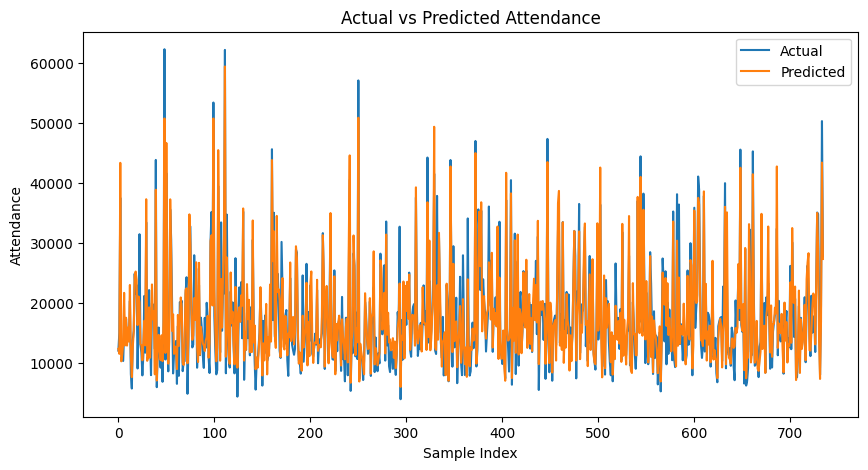

In [948]:
# catboost
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),  
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1), 
        'depth': trial.suggest_int('depth', 4, 10),  
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10),  
        'border_count': trial.suggest_int('border_count', 32, 255),  
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),  
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),  
        'one_hot_max_size': trial.suggest_int('one_hot_max_size', 2, 10),  
        'eval_metric': 'RMSE', 
        'random_seed': 42,  
        'logging_level': 'Silent',  
        'early_stopping_rounds': 100  
    }

    model = CatBoostRegressor(**param)
    model.fit(train_pool, eval_set=test_pool, verbose=0)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return r2

study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=100, timeout=600)  

print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = trial.params
model = CatBoostRegressor(**best_params, random_seed=42)
model.fit(train_pool, eval_set=test_pool, plot=True)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'Best R² Score: {r2:.4f}')
print(f'Best RMSE:{rmse:.4f}')

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Attendance')
plt.title('Actual vs Predicted Attendance')
plt.show()

In [949]:
# check

result = pd.read_csv('data/result.csv',header=None)
result = result.iloc[:,1]

pred = model.predict(test)
rmse = np.sqrt(mean_squared_error(result,pred))

print(f'Best RMSE:{rmse:.4f}')

Best RMSE:7630.6778


In [950]:
# predict

predict = model.predict(test)

submit = pd.read_csv('data/sample_submit.csv', header=None)

submit[1] = predict
submit.to_csv('submission.csv', header=None, index=False)

print('Already did the prediction')

Already did the prediction
